MODELING & EVALUATION

Regression: (Limit Balance)

In [1]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import pydotplus


#sklearn stuff
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.svm import SVR, SVC
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.decomposition import PCA
from sklearn.utils import resample

from math import sqrt
%matplotlib inline

In [2]:
# Import the Pre-processed Dataset
data = pd.read_csv('Credit_Modeling.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29965 entries, 0 to 29964
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LIMIT_BAL    29965 non-null  int64  
 1   SEX          29965 non-null  int64  
 2   MARRIAGE     29965 non-null  int64  
 3   AGE          29965 non-null  int64  
 4   PAY_1        29965 non-null  int64  
 5   PAY_2        29965 non-null  int64  
 6   PAY_3        29965 non-null  int64  
 7   PAY_4        29965 non-null  int64  
 8   PAY_5        29965 non-null  int64  
 9   PAY_6        29965 non-null  int64  
 10  BILL_AMT1    29965 non-null  int64  
 11  BILL_AMT2    29965 non-null  int64  
 12  BILL_AMT3    29965 non-null  int64  
 13  BILL_AMT4    29965 non-null  int64  
 14  BILL_AMT5    29965 non-null  int64  
 15  BILL_AMT6    29965 non-null  int64  
 16  PAY_AMT1     29965 non-null  int64  
 17  PAY_AMT2     29965 non-null  int64  
 18  PAY_AMT3     29965 non-null  int64  
 19  PAY_

In [3]:
# Create a variable for No Delayed Payments in the last 6 months
data['No_Delays_6'] = 0
data.loc[((data.PAY_1 < 1) & (data.PAY_2 < 1) & (data.PAY_3 < 1) & (data.PAY_4 < 1) & (data.PAY_5 < 1) & (data.PAY_6 < 1)),
         'No_Delays_6'] = 1 # Duly Paid Last 6 Months
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29965 entries, 0 to 29964
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LIMIT_BAL    29965 non-null  int64  
 1   SEX          29965 non-null  int64  
 2   MARRIAGE     29965 non-null  int64  
 3   AGE          29965 non-null  int64  
 4   PAY_1        29965 non-null  int64  
 5   PAY_2        29965 non-null  int64  
 6   PAY_3        29965 non-null  int64  
 7   PAY_4        29965 non-null  int64  
 8   PAY_5        29965 non-null  int64  
 9   PAY_6        29965 non-null  int64  
 10  BILL_AMT1    29965 non-null  int64  
 11  BILL_AMT2    29965 non-null  int64  
 12  BILL_AMT3    29965 non-null  int64  
 13  BILL_AMT4    29965 non-null  int64  
 14  BILL_AMT5    29965 non-null  int64  
 15  BILL_AMT6    29965 non-null  int64  
 16  PAY_AMT1     29965 non-null  int64  
 17  PAY_AMT2     29965 non-null  int64  
 18  PAY_AMT3     29965 non-null  int64  
 19  PAY_

In [4]:
# Set features and target variable
X = data.drop(['LIMIT_BAL','SEX','MARRIAGE','AGE','BA1_2_LB','LB_Disc'], axis=1)
y = data['LIMIT_BAL']
print(X.shape)
print(y.shape)

(29965, 27)
(29965,)


I will start with just the models and raw data to see the progression as I move forward.

In [5]:
# Prepare the Models
algosClass = []
algosClass.append(('Random Forest Regressor', RandomForestRegressor()))
algosClass.append(('Gradient Boosting Regressor', GradientBoostingRegressor()))
algosClass.append(('SVR', SVR()))
algosClass.append(('MLP Regressor', MLPRegressor()))

In [6]:
# Regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X, y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [7]:
# Output
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Regressor 0.4516983414748061
Gradient Boosting Regressor 0.4576124854301031
SVR -0.05033023124413213
MLP Regressor -0.27432151850284603


Not very good. Lets add some parameters to these models and see if that helps.

In [8]:
# Prepare the Models
algosClass = []
algosClass.append(('Random Forest Regressor', RandomForestRegressor(n_estimators=300, max_depth=3, random_state=0)))
algosClass.append(('Gradient Boosting Regressor', GradientBoostingRegressor(n_estimators=300, learning_rate=0.2,
                                                                            max_depth=3, random_state=0, loss='ls')))
algosClass.append(('SVR', SVR()))
algosClass.append(('MLP Regressor', MLPRegressor(alpha=0.1, random_state=123, max_iter=1000)))

In [9]:
# Regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X, y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [10]:
# Output
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Regressor 0.3433113075155692
Gradient Boosting Regressor 0.4653949639074079
SVR -0.05033023124413213
MLP Regressor 0.1470709737760981


The parameters improved the r2 score for Gradient Boosting and MLP Regressors but decreased the score for Random Forest Regressor. I will keep the parameters for both improved models and drop the SVR model. Lets apply some standardization to the data and see if that improves the scores.

In [11]:
# Create the scaler, fit it to X, and then transform X to scaled data
scaler = preprocessing.StandardScaler(with_mean=False).fit(X)
X_scaled = scaler.transform(X)
print(X_scaled.shape)

(29965, 27)


In [12]:
# Prepare the Models
algosClass = []
algosClass.append(('Random Forest Regressor', RandomForestRegressor()))
algosClass.append(('Gradient Boosting Regressor', GradientBoostingRegressor(n_estimators=300, learning_rate=0.2,
                                                                            max_depth=3, random_state=0, loss='ls')))
algosClass.append(('MLP Regressor', MLPRegressor(alpha=0.1, random_state=123, max_iter=1000)))

In [13]:
# Regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X_scaled, y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
# Output
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Regressor 0.45179509422254616
Gradient Boosting Regressor 0.4653596034971456
MLP Regressor 0.32297223396338576


The scaler greatly improved the score for MLP Regressor, more than doubling it. No improvements for Random Forest and Gradient Boosting Regressors. Lets use PCA for feature selection and dimensionality reduction to see if we can improve on these scores.

In [15]:
pca = PCA(n_components=24, whiten=True)
pca.fit(X)
X_pca = pca.transform(X)
print(X_pca.shape)

(29965, 24)


In [16]:
# Prepare the Models
algosClass = []
algosClass.append(('Random Forest Regressor', RandomForestRegressor()))
algosClass.append(('Gradient Boosting Regressor', GradientBoostingRegressor(n_estimators=300, learning_rate=0.2,
                                                                            max_depth=3, random_state=0, loss='ls')))
algosClass.append(('MLP Regressor', MLPRegressor(alpha=0.05, random_state=123, learning_rate='adaptive', max_iter=2000)))

In [17]:
# Cross Validation
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X_pca, y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
# Output
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Regressor 0.43237292348844614
Gradient Boosting Regressor 0.44674699854796796
MLP Regressor 0.35724331842985085


The MLP Regressor improved again but Random Forest and Gradient Boosting Regressors decreased. At this point, I am dropping the MLP and Random Forest Regressors and will focus on just the Gradient Boosting Regressor, as it has consistently scored the highest.

In [19]:
# Change the Features Sex, Default, and Marriage
data['Sex_Male'] = 0
data.loc[(data.SEX == 1), 'Sex_Male'] = 1

data['Sex_Female'] = 0
data.loc[(data.SEX == 2), 'Sex_Female'] = 1

data['Default_No'] = 0
data.loc[(data.Default == 0), 'Default_No'] = 1

data['Default_Yes'] = 0
data.loc[(data.Default == 1), 'Default_Yes'] = 1

data['Married'] = 0
data.loc[(data.MARRIAGE == 1), 'Married'] = 1

data['Single'] = 0
data.loc[(data.MARRIAGE == 2), 'Single'] = 1

data['Marriage_Other'] = 0
data.loc[(data.MARRIAGE == 3), 'Marriage_Other'] = 1
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29965 entries, 0 to 29964
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LIMIT_BAL       29965 non-null  int64  
 1   SEX             29965 non-null  int64  
 2   MARRIAGE        29965 non-null  int64  
 3   AGE             29965 non-null  int64  
 4   PAY_1           29965 non-null  int64  
 5   PAY_2           29965 non-null  int64  
 6   PAY_3           29965 non-null  int64  
 7   PAY_4           29965 non-null  int64  
 8   PAY_5           29965 non-null  int64  
 9   PAY_6           29965 non-null  int64  
 10  BILL_AMT1       29965 non-null  int64  
 11  BILL_AMT2       29965 non-null  int64  
 12  BILL_AMT3       29965 non-null  int64  
 13  BILL_AMT4       29965 non-null  int64  
 14  BILL_AMT5       29965 non-null  int64  
 15  BILL_AMT6       29965 non-null  int64  
 16  PAY_AMT1        29965 non-null  int64  
 17  PAY_AMT2        29965 non-null 

In [20]:
data.sample(20)

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BA1_2_LB,LB_Disc,No_Delays_6,Sex_Male,Sex_Female,Default_No,Default_Yes,Married,Single,Marriage_Other
18267,200000,1,1,54,1,2,0,0,0,0,...,0.964445,3,0,1,0,1,0,1,0,0
22394,60000,2,1,37,1,2,2,2,2,2,...,0.177750,2,0,0,1,0,1,1,0,0
5175,190000,1,1,50,2,2,2,2,2,2,...,0.634116,3,0,1,0,0,1,1,0,0
8359,70000,2,1,40,0,0,0,0,0,0,...,0.009414,2,1,0,1,1,0,1,0,0
23418,650000,2,2,39,0,0,0,0,0,0,...,0.990977,4,1,0,1,1,0,0,1,0
8771,70000,2,2,24,0,0,0,0,0,0,...,0.599157,2,1,0,1,1,0,0,1,0
28818,180000,2,2,38,0,0,0,0,0,0,...,0.856139,3,1,0,1,1,0,0,1,0
3099,400000,2,1,41,0,0,0,0,0,0,...,0.953783,4,1,0,1,0,1,1,0,0
1351,280000,2,1,39,0,0,0,0,0,0,...,0.972175,4,1,0,1,0,1,1,0,0
19468,120000,2,2,28,0,0,0,0,0,0,...,0.970300,3,1,0,1,1,0,0,1,0


In [21]:
# Separating features from the target variable (Limit Bal)
X = data.drop(['LIMIT_BAL','LB_Disc','BA1_2_LB','SEX','MARRIAGE','Default'], axis=1)
y = data['LIMIT_BAL']
print(X.shape)
print(y.shape)

(29965, 34)
(29965,)


In [22]:
pca = PCA(n_components=30, whiten=True)
pca.fit(X)
X_pca = pca.transform(X)
print(X_pca.shape)

(29965, 30)


In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = .20, random_state = 123)

In [24]:
scaler = preprocessing.StandardScaler(with_mean=False).fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Train the Model
algo = GradientBoostingRegressor(n_estimators=300, learning_rate=0.2, max_depth=3, random_state=0, loss='ls')
model = algo.fit(X_train_scaled, y_train)
preds = model.predict(X_test_scaled)

In [26]:
# Assessment
print('R2 Score is: %.3f' % r2_score(y_test, preds))
print('MSE is: %.3f' % mean_squared_error(y_test, preds))
rms = sqrt(mean_squared_error(y_test, preds))
print('RMSE is: %.3f' % rms)

R2 Score is: 0.473
MSE is: 8710201982.564
RMSE is: 93328.463


The model is not improving much at this point, lets use PCA to show the most important features and go from there.

In [32]:
pca = PCA()
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(29965, 34)


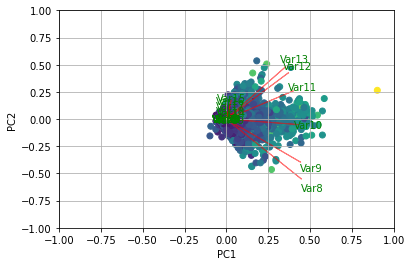

In [33]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(X_pca[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

The graph shows variables 8 through 13 are the most important features, which are Bill Amounts 1 - 6.

In [36]:
pca.explained_variance_ratio_

array([8.48627348e-01, 4.87374723e-02, 2.70994896e-02, 1.60688789e-02,
       1.44251791e-02, 1.19934604e-02, 1.01500386e-02, 9.31751135e-03,
       4.72272226e-03, 3.80735329e-03, 2.69880627e-03, 2.35173652e-03,
       3.02302499e-09, 2.24355251e-10, 7.84981293e-11, 2.02676860e-11,
       1.92307926e-11, 1.33346466e-11, 1.10802254e-11, 8.81976027e-12,
       6.76219104e-12, 6.66583078e-12, 5.58667003e-12, 5.12772222e-12,
       3.63372079e-12, 3.13918778e-12, 1.01563864e-12, 7.08023565e-13,
       8.39363133e-33, 8.39363133e-33, 8.39363133e-33, 8.39363133e-33,
       8.39363133e-33, 8.39363133e-33])

In [35]:
print(abs( pca.components_ ))

[[3.26938092e-06 7.67863607e-08 1.32307528e-07 ... 8.06175792e-08
  6.49618321e-08 1.56557471e-08]
 [1.79478464e-06 6.43173131e-07 7.09352413e-07 ... 7.56176785e-09
  3.79539562e-08 3.03921883e-08]
 [3.64982280e-06 1.66679216e-06 1.90507869e-06 ... 1.08320940e-07
  1.45897161e-07 3.75762214e-08]
 ...
 [0.00000000e+00 2.62346177e-13 1.69554912e-13 ... 1.19111692e-02
  1.31017316e-01 2.73945801e-01]
 [0.00000000e+00 8.59565526e-14 9.98230315e-14 ... 3.52206213e-01
  4.56521907e-01 5.60837601e-01]
 [0.00000000e+00 1.12528228e-12 3.46969844e-13 ... 3.60430456e-01
  8.25268082e-03 3.76935818e-01]]


I see that PC1 explains over 80% of the variance, lets make a data frame to show the top 10 most important features in PC1 and PC2.

In [39]:
# X is the original numeric dataframe
# pca is the model
def create_importance_dataframe(pca, X):

    # Change pcs components ndarray to a dataframe
    importance_df = pd.DataFrame(pca.components_)

    # Assign columns
    importance_df.columns = X.columns

    # Change to absolute values
    importance_df = importance_df.apply(np.abs)

    # Transpose
    importance_df = importance_df.transpose()

    # Change column names again

    ## First get number of pcs
    num_pcs = importance_df.shape[1]

    ## Generate the new column names
    new_columns = [f'PC{i}' for i in range(1, num_pcs + 1)]

    ## Now rename
    importance_df.columns = new_columns

    # Return importance df
    return importance_df

# Call function to create importance df
importance_df = create_importance_dataframe(pca, X)

# Show first few rows
display(importance_df.head())

# Sort depending on PC of interest

## PC1 top 10 important features
pc1_top_10_features = importance_df['PC1'].sort_values(ascending = False)[:10]
print(), print(f'PC1 top 10 feautres are \n')
display(pc1_top_10_features )

## PC2 top 10 important features
pc2_top_10_features = importance_df['PC2'].sort_values(ascending = False)[:10]
print(), print(f'PC2 top 10 feautres are \n')
display(pc2_top_10_features )

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34
AGE,3.269381e-06,1.794785e-06,0.000004,0.000011,1.855506e-06,1.099145e-06,2.499411e-06,2.216873e-06,4.131864e-06,0.000003,...,0.001128,0.001262,0.008368,0.000368,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
PAY_1,7.678636e-08,6.431731e-07,0.000002,0.000004,6.553428e-07,4.338503e-07,6.733254e-07,7.331974e-07,1.356663e-06,0.000003,...,0.182483,0.365103,0.000754,0.007620,2.370685e-13,1.575080e-13,2.342967e-13,2.623462e-13,8.595655e-14,1.125282e-12
PAY_2,1.323075e-07,7.093524e-07,0.000002,0.000004,9.706981e-07,1.405937e-06,7.973618e-07,1.152944e-06,9.227157e-07,0.000003,...,0.172899,0.087502,0.001988,0.004391,1.202077e-13,3.807068e-14,1.186564e-13,1.695549e-13,9.982303e-14,3.469698e-13
PAY_3,2.664934e-08,1.161963e-06,0.000002,0.000004,2.044101e-07,1.452379e-06,4.302076e-07,8.433179e-07,1.045741e-06,0.000002,...,0.289160,0.105482,0.001835,0.001809,9.497309e-14,2.211808e-13,1.181800e-13,2.521270e-15,1.932599e-13,9.047983e-14
PAY_4,1.213515e-08,1.507615e-06,0.000001,0.000004,1.197423e-06,1.358449e-07,8.160874e-07,8.770077e-07,2.846819e-06,0.000001,...,0.497311,0.115816,0.004004,0.000165,1.363905e-13,2.035726e-13,5.826901e-14,1.004584e-13,1.207466e-13,1.101596e-12



PC1 top 10 feautres are 



BILL_AMT1    0.446540
BILL_AMT2    0.440868
BILL_AMT3    0.429192
BILL_AMT4    0.397487
BILL_AMT5    0.369472
BILL_AMT6    0.352661
PAY_AMT2     0.028388
PAY_AMT1     0.024965
PAY_AMT3     0.023833
PAY_AMT6     0.020614
Name: PC1, dtype: float64


PC2 top 10 feautres are 



BILL_AMT1    0.548944
BILL_AMT6    0.479720
BILL_AMT5    0.424129
BILL_AMT2    0.393812
BILL_AMT4    0.257491
PAY_AMT2     0.169292
PAY_AMT3     0.141902
PAY_AMT4     0.100087
PAY_AMT5     0.062050
BILL_AMT3    0.050381
Name: PC2, dtype: float64

The df shows the Bill Amount features are by far the most important, as did the graph. I will try these features with the model training to see if the score improves at all but usually less features means lower score.

In [40]:
X = data[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2',
         'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
Y = data['LIMIT_BAL']
print(X.shape)
print(y.shape)

(29965, 12)
(29965,)


In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 123)

In [42]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# Train the Model
algo = GradientBoostingRegressor(n_estimators=300, learning_rate=0.2, max_depth=3, random_state=0, loss='ls')
model = algo.fit(X_train_scaled, y_train)
preds = model.predict(X_test_scaled)

In [44]:
# Assessment
print('R2 Score is: %.3f' % r2_score(y_test, preds))
print('MSE is: %.3f' % mean_squared_error(y_test, preds))
rms = sqrt(mean_squared_error(y_test, preds))
print('RMSE is: %.3f' % rms)

R2 Score is: 0.416
MSE is: 9713732630.791
RMSE is: 98558.270


Regression Conclusion:

I was not able to build a regression model that could accurately predict the Credit Limit amount for new customer loans. The range, 10,000 to 1,000,000, is probably just too large for the models to accurately predict. The Gradient Boosting Regressor had the highest scores of the 4 models with an r2 score of 0.473 and RMSE of 93,328. The results of the PCA revealed that the variables Bill Amount 1-6 and Pay Amount 1-6 are the most important features in the dataset for predicting Credit Limit. I will now try to build a model that can predict if a customer should be approved or not for a new credit loan (ie Defualt is Target Variable).

Classification: (Default)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29965 entries, 0 to 29964
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LIMIT_BAL       29965 non-null  int64  
 1   SEX             29965 non-null  int64  
 2   MARRIAGE        29965 non-null  int64  
 3   AGE             29965 non-null  int64  
 4   PAY_1           29965 non-null  int64  
 5   PAY_2           29965 non-null  int64  
 6   PAY_3           29965 non-null  int64  
 7   PAY_4           29965 non-null  int64  
 8   PAY_5           29965 non-null  int64  
 9   PAY_6           29965 non-null  int64  
 10  BILL_AMT1       29965 non-null  int64  
 11  BILL_AMT2       29965 non-null  int64  
 12  BILL_AMT3       29965 non-null  int64  
 13  BILL_AMT4       29965 non-null  int64  
 14  BILL_AMT5       29965 non-null  int64  
 15  BILL_AMT6       29965 non-null  int64  
 16  PAY_AMT1        29965 non-null  int64  
 17  PAY_AMT2        29965 non-null 

In [46]:
# Create variables for percentage of Bill Amount 2-6 to Limit Balance
data['BA2_2_LB'] = (data.LIMIT_BAL - data.BILL_AMT2) / data.LIMIT_BAL
data['BA3_2_LB'] = (data.LIMIT_BAL - data.BILL_AMT3) / data.LIMIT_BAL
data['BA4_2_LB'] = (data.LIMIT_BAL - data.BILL_AMT4) / data.LIMIT_BAL
data['BA5_2_LB'] = (data.LIMIT_BAL - data.BILL_AMT5) / data.LIMIT_BAL
data['BA6_2_LB'] = (data.LIMIT_BAL - data.BILL_AMT6) / data.LIMIT_BAL
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29965 entries, 0 to 29964
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LIMIT_BAL       29965 non-null  int64  
 1   SEX             29965 non-null  int64  
 2   MARRIAGE        29965 non-null  int64  
 3   AGE             29965 non-null  int64  
 4   PAY_1           29965 non-null  int64  
 5   PAY_2           29965 non-null  int64  
 6   PAY_3           29965 non-null  int64  
 7   PAY_4           29965 non-null  int64  
 8   PAY_5           29965 non-null  int64  
 9   PAY_6           29965 non-null  int64  
 10  BILL_AMT1       29965 non-null  int64  
 11  BILL_AMT2       29965 non-null  int64  
 12  BILL_AMT3       29965 non-null  int64  
 13  BILL_AMT4       29965 non-null  int64  
 14  BILL_AMT5       29965 non-null  int64  
 15  BILL_AMT6       29965 non-null  int64  
 16  PAY_AMT1        29965 non-null  int64  
 17  PAY_AMT2        29965 non-null 

In [48]:
data = data.drop(['SEX','MARRIAGE','Default_No','Default_Yes'], axis=1)

In [49]:
X = data.drop(['Default'], axis=1)
y = data['Default']
print(X.shape)
print(y.shape)

(29965, 40)
(29965,)


In [50]:
# Prepare the Models
algosClass = []
algosClass.append(('Random Forest Classifier', RandomForestClassifier()))
algosClass.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
algosClass.append(('Support Vector Classifier', SVC()))
algosClass.append(('MLP Classifier', MLPClassifier()))

In [51]:
# Classification
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X, y, cv=3)
    names.append(name)
    results.append(result)

In [52]:
# Output
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Classifier 0.8133491393997554
Gradient Boosting Classifier 0.8209914800286455
Support Vector Classifier 0.7787418650169439
MLP Classifier 0.6171484835428169


Not a bad start. Lets standardize the data and see if accuracy improves.

In [53]:
# Create the scaler, fit it to X, and then transform X to scaled data
scaler = preprocessing.StandardScaler(with_mean=False).fit(X)
X_scaled = scaler.transform(X)
print(X_scaled.shape)

(29965, 40)


In [54]:
# Classification
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X_scaled, y, cv=3)
    names.append(name)
    results.append(result)

C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [55]:
# Output
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Classifier 0.8130154156088851
Gradient Boosting Classifier 0.8209247399478902
Support Vector Classifier 0.819589777964144
MLP Classifier 0.8041049633304418


I can clearly see that standardizing the data greatly improves some models, while having little to no affect on other models like Random Forst and Gradient Boosting. Now I want to use PCA for feature selection and dimensionality reduction.

In [56]:
pca = PCA()
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(29965, 40)


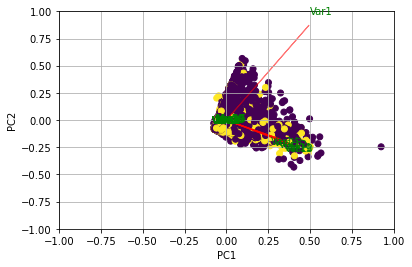

In [57]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(X_pca[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [58]:
pca.explained_variance_ratio_

array([6.10612924e-01, 2.95117659e-01, 3.05447669e-02, 1.69396869e-02,
       9.42411874e-03, 9.04756293e-03, 7.54956892e-03, 6.38914729e-03,
       5.84098414e-03, 2.96871351e-03, 2.38662298e-03, 1.69889595e-03,
       1.47934730e-03, 1.86863342e-09, 1.40897714e-10, 4.61931044e-11,
       1.27343261e-11, 1.19378209e-11, 8.48977255e-12, 7.31746218e-12,
       6.37006576e-12, 4.47107308e-12, 4.24333330e-12, 3.99245667e-12,
       3.54570481e-12, 3.22335274e-12, 2.28677397e-12, 1.97785304e-12,
       7.05285924e-13, 6.37926112e-13, 4.45856544e-13, 2.44138448e-13,
       1.53835339e-13, 9.93624035e-14, 9.48626631e-14, 4.73966169e-33,
       4.73966169e-33, 4.73966169e-33, 4.73966169e-33, 4.73966169e-33])

I see that PC1 and PC2 explain 90% of the variance, lets make a data frame to show the top 20 most important features in PC1 and PC2.

In [60]:
# X is the original numeric dataframe
# pca is the model
def create_importance_dataframe(pca, X):

    # Change pcs components ndarray to a dataframe
    importance_df = pd.DataFrame(pca.components_)

    # Assign columns
    importance_df.columns = X.columns

    # Change to absolute values
    importance_df = importance_df.apply(np.abs)

    # Transpose
    importance_df = importance_df.transpose()

    # Change column names again

    ## First get number of pcs
    num_pcs = importance_df.shape[1]

    ## Generate the new column names
    new_columns = [f'PC{i}' for i in range(1, num_pcs + 1)]

    ## Now rename
    importance_df.columns = new_columns

    # Return importance df
    return importance_df

# Call function to create importance df
importance_df = create_importance_dataframe(pca, X)

# Show first few rows
display(importance_df.head())

# Sort depending on PC of interest

## PC1 top 20 important features
pc1_top_20_features = importance_df['PC1'].sort_values(ascending = False)[:20]
print(), print(f'PC1 top 20 feautres are \n')
display(pc1_top_20_features )

## PC2 top 20 important features
pc2_top_20_features = importance_df['PC2'].sort_values(ascending = False)[:20]
print(), print(f'PC2 top 20 feautres are \n')
display(pc2_top_20_features )

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
LIMIT_BAL,4.916858e-01,0.868962,2.061082e-02,1.845104e-02,0.044174,1.701076e-02,1.134871e-03,1.031631e-03,0.009478,3.763292e-03,...,3.977159e-08,9.843155e-08,5.134532e-09,4.204211e-08,1.206316e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
AGE,5.558580e-06,0.000008,4.129510e-06,2.702688e-07,0.000005,1.566212e-06,1.500083e-06,2.041818e-06,0.000007,1.470180e-07,...,3.734293e-04,3.038061e-04,2.976327e-05,4.641719e-05,6.243234e-05,2.596276e-14,1.650785e-15,9.190073e-16,2.776995e-17,1.588733e-15
PAY_1,2.415214e-07,0.000001,9.347977e-07,1.145391e-06,0.000003,1.087870e-06,4.177650e-07,6.450921e-07,0.000001,9.723994e-07,...,5.092214e-03,2.505582e-03,9.858579e-04,4.980460e-04,8.736010e-04,1.572597e-13,3.558080e-14,2.332228e-14,2.751997e-14,1.789009e-15
PAY_2,2.635762e-07,0.000001,1.062429e-06,1.285629e-06,0.000002,1.264194e-06,1.379017e-06,7.585250e-07,0.000002,4.261634e-07,...,4.525598e-03,5.806781e-03,3.210201e-03,1.057672e-02,7.518097e-04,1.127823e-13,5.377047e-14,1.727978e-14,3.210361e-14,3.723732e-14
PAY_3,3.281170e-07,0.000001,1.492977e-06,1.318987e-06,0.000003,5.901115e-07,1.475957e-06,3.936789e-07,0.000001,5.995955e-07,...,1.954786e-03,4.233196e-04,1.775244e-03,1.272260e-02,2.364103e-03,8.354953e-14,2.363237e-14,2.300215e-14,6.370740e-15,7.829493e-15



PC1 top 20 feautres are 



LIMIT_BAL    4.916858e-01
BILL_AMT1    3.884241e-01
BILL_AMT2    3.813305e-01
BILL_AMT3    3.721580e-01
BILL_AMT4    3.463797e-01
BILL_AMT5    3.229038e-01
BILL_AMT6    3.085607e-01
PAY_AMT2     3.127975e-02
PAY_AMT3     2.681238e-02
PAY_AMT1     2.655962e-02
PAY_AMT6     2.480320e-02
PAY_AMT5     2.219793e-02
PAY_AMT4     2.216147e-02
AGE          5.558580e-06
LB_Disc      3.764304e-06
BA1_2_LB     6.724432e-07
BA2_2_LB     6.710713e-07
BA3_2_LB     6.699432e-07
Age_Disc     6.481356e-07
BA4_2_LB     6.183482e-07
Name: PC1, dtype: float64


PC2 top 20 feautres are 



LIMIT_BAL    0.868962
BILL_AMT2    0.226430
BILL_AMT1    0.221398
BILL_AMT3    0.216588
BILL_AMT4    0.194090
BILL_AMT5    0.176808
BILL_AMT6    0.167391
PAY_AMT6     0.015392
PAY_AMT5     0.011742
PAY_AMT3     0.011019
PAY_AMT2     0.010841
PAY_AMT4     0.010412
PAY_AMT1     0.005762
AGE          0.000008
LB_Disc      0.000006
BA1_2_LB     0.000002
BA2_2_LB     0.000002
BA3_2_LB     0.000002
BA4_2_LB     0.000002
BA5_2_LB     0.000002
Name: PC2, dtype: float64

Limit Balance is actually the top variable for both PC1 and PC2, followed by Bill Amounts 1-6 and Pay Amounts 1-6.

In [61]:
pca = PCA()
X_pca_scaled = pca.fit_transform(X_scaled)
print(X_pca_scaled.shape)

(29965, 40)


In [62]:
# Classification
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X_pca_scaled, y, cv=3)
    names.append(name)
    results.append(result)

C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [63]:
# Output
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Classifier 0.8141167004436425
Gradient Boosting Classifier 0.81728707144539
Support Vector Classifier 0.8195897813051571
MLP Classifier 0.802202660545075


In [64]:
pca = PCA(n_components=20, whiten=True)
X_pca_scaled_2 = pca.fit_transform(X_scaled)
print(X_pca_scaled_2.shape)

(29965, 20)


In [65]:
# Classification
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X_pca_scaled_2, y, cv=3)
    names.append(name)
    results.append(result)

C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [66]:
# Output
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Classifier 0.8092442869909537
Gradient Boosting Classifier 0.8136494396940358
Support Vector Classifier 0.8163192600901173
MLP Classifier 0.8080094551744202


What I observe from this is that the Random Forest Classifier slightly improves from PCA, Gradient Boosting Classifier does not improve from scaling and PCA, while SV and MLP Classifiers improve from Scaling. Again, the Gradient Boosting Classifier is consistently more accurate than the other models, and PCA and scaling is not needed.

In [70]:
X = data[['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2',
         'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','AGE','BA1_2_LB',
         'BA2_2_LB','BA3_2_LB','BA4_2_LB','BA5_2_LB','BA6_2_LB','No_Delays_6']]
y = data['Default']
print(X.shape)
print(y.shape)

(29965, 27)
(29965,)


In [71]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 123)

In [72]:
algo = GradientBoostingClassifier()
model = algo.fit(X_train, y_train)
preds = model.predict(X_test)

In [73]:
# View the Accuracy Score of the model
accuracy_score(y_test, preds)

0.8198077949813134

In [74]:
# Print the classification report using the predictions and ground truth to assess the model
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5804
           1       0.70      0.35      0.47      1688

    accuracy                           0.82      7492
   macro avg       0.77      0.65      0.68      7492
weighted avg       0.80      0.82      0.80      7492



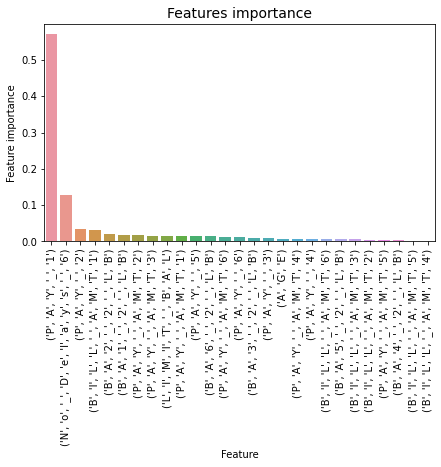

In [75]:
tmp = pd.DataFrame({'Feature': X, 'Feature importance': algo.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

The variable Pay 1 is by far the most important feature for Default. Lets set some parameters for the model.

In [77]:
# Train the Model
algo = GradientBoostingClassifier(n_estimators=300, learning_rate=0.2, max_depth=3, random_state=0)
model = algo.fit(X_train, y_train)
preds = model.predict(X_test)

In [78]:
# View the Accuracy Score of the model
accuracy_score(y_test, preds)

0.8175387079551522

In [79]:
# Print the classification report using the predictions and ground truth to assess the model
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5804
           1       0.68      0.36      0.47      1688

    accuracy                           0.82      7492
   macro avg       0.76      0.66      0.68      7492
weighted avg       0.80      0.82      0.80      7492



In [80]:
# Train the Model
algo = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=4, random_state=0)
model = algo.fit(X_train, y_train)
preds = model.predict(X_test)

In [81]:
# View the Accuracy Score of the model
accuracy_score(y_test, preds)

0.8190069407367859

In [82]:
# Print the classification report using the predictions and ground truth to assess the model
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5804
           1       0.68      0.37      0.48      1688

    accuracy                           0.82      7492
   macro avg       0.76      0.66      0.68      7492
weighted avg       0.80      0.82      0.80      7492



I want to get the Recall score up for Default = 1 (Less FN predictions). I will try to balance out the target variable by upsampling the minority group (Default=1) and downsampling the majority group (Default=0).

In [83]:
features = ['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2',
         'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','AGE','BA1_2_LB',
         'BA2_2_LB','BA3_2_LB','BA4_2_LB','BA5_2_LB','BA6_2_LB','No_Delays_6']
y = data['Default'].copy()
X = data[features].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 123)

In [84]:
# create the training df by remerging X_train and y_train
df_train = X_train.join(y_train)
df_train.sample(10)

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,PAY_6,AGE,BA1_2_LB,BA2_2_LB,BA3_2_LB,BA4_2_LB,BA5_2_LB,BA6_2_LB,No_Delays_6,Default
8332,480000,24610,-310,148544,18791,5909,68988,4,149654,18885,...,0,58,0.948729,1.000646,0.690533,0.960852,0.987690,0.856275,1,1
29411,100000,390,390,390,780,0,599,390,390,780,...,0,29,0.996100,0.996100,0.996100,0.992200,1.000000,0.994010,1,1
1550,170000,93420,96284,97322,99419,101590,111679,4371,3533,3716,...,0,48,0.450471,0.433624,0.427518,0.415182,0.402412,0.343065,1,1
28431,180000,101526,101957,104317,106583,108811,111160,3000,4000,4000,...,0,39,0.435967,0.433572,0.420461,0.407872,0.395494,0.382444,0,0
26390,160000,39962,45640,38988,19825,22654,16158,10000,10000,5000,...,0,41,0.750238,0.714750,0.756325,0.876094,0.858413,0.899012,1,0
12951,50000,11744,10935,11664,10872,9392,9456,1507,1500,300,...,0,23,0.765120,0.781300,0.766720,0.782560,0.812160,0.810880,0,1
12254,270000,19769,34813,43852,29677,33341,28413,34813,43856,29682,...,0,40,0.926781,0.871063,0.837585,0.890085,0.876515,0.894767,1,0
3297,230000,8328,0,600,600,300,150,0,600,0,...,2,26,0.963791,1.000000,0.997391,0.997391,0.998696,0.999348,0,1
18266,190000,187295,186189,186002,170873,98013,94600,7000,7962,7000,...,0,54,0.014237,0.020058,0.021042,0.100668,0.484142,0.502105,1,0
14338,20000,19401,19670,19839,20236,19807,19843,1331,2000,688,...,0,47,0.029950,0.016500,0.008050,-0.011800,0.009650,0.007850,0,1


In [85]:
# Separate majority and minority classes
df_majority = df_train[df_train.Default==0]
df_minority = df_train[df_train.Default==1]

print(df_majority.Default.count())
print("-----------")
print(df_minority.Default.count())
print("-----------")
print(df_train.Default.value_counts())

17531
-----------
4942
-----------
0    17531
1     4942
Name: Default, dtype: int64


In [86]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=17531,    # to match majority class
                                 random_state=587) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.Default.value_counts()

1    17531
0    17531
Name: Default, dtype: int64

In [87]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=4942,     # to match minority class
                                 random_state=587) # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.Default.value_counts()

1    4942
0    4942
Name: Default, dtype: int64

In [88]:
X_upsampled = df_upsampled.drop(['Default'], axis=1)
y_upsampled = df_upsampled.Default

In [89]:
algo = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=4, random_state=0)
model = algo.fit(X_upsampled, y_upsampled)
preds = model.predict(X_test)

In [90]:
# Print the classification report using the predictions and ground truth to assess the model
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      5804
           1       0.47      0.62      0.54      1688

    accuracy                           0.76      7492
   macro avg       0.68      0.71      0.69      7492
weighted avg       0.79      0.76      0.77      7492



In [91]:
X_downsampled = df_downsampled.drop(['Default'], axis=1)
y_downsampled = df_downsampled.Default

In [92]:
model = algo.fit(X_downsampled, y_downsampled)
preds = model.predict(X_test)

In [93]:
# Print the classification report using the predictions and ground truth to assess the model
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      5804
           1       0.44      0.66      0.53      1688

    accuracy                           0.73      7492
   macro avg       0.66      0.71      0.67      7492
weighted avg       0.78      0.73      0.75      7492



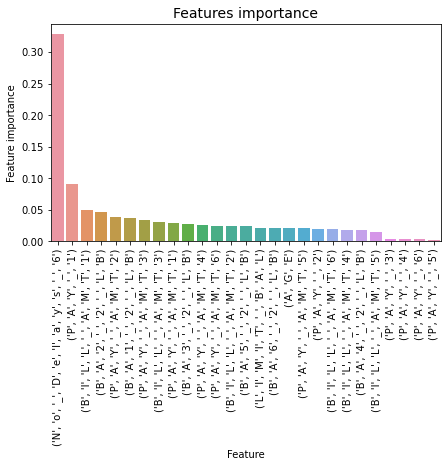

In [94]:
tmp = pd.DataFrame({'Feature': X_downsampled, 'Feature importance': algo.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

Classification Conclusion:

I was able to build a classification model that could accurately predict if a new customer loan would Default or not. The Gradient Boosting Classifier had the highest scores of the 4 models with an accuracy score of 0.82 and a recall score of 0.66. The results of the PCA revealed that the variables Limit Balance, Bill Amount 1-6 and Pay Amount 1-6 are the most important features in the dataset for predicting Default. I focused on improving the model's Recall Score because it accounts for the False Negative predictions (ie model predicts Not Default and its Default). This would have far more consequences than a False Positive prediction (ie model predicts Default and its Not Default) which is scored in Precision. As the goal of this project was to decrease the Default Rate for new customer credit loans, I beleive the Recall Score is more meaningful and trained the model on increasing this score by balancing the data with upsampling and downsampling techniques. I learned that standardization and PCA greatly improves some models, like SVC and MLP, while having little to no impact on other models, like Random Forest and Gradient Boosting Classifiers. When deciding if a new customer loan should be approved or not, I recommend focusing on the customers credit payment history and Bill Amounts compared to the Credit Limit, as these are the most important factors for predicting Default. One of the best indicators I found for if a customer will default is the variable No_Delays_6, which indicates if a customer has any delay payments the past 6 months, and the variable BA_2_LB, which indicates how close each Bill Amount is to the Credit Limit. I would also recommend replacing the demographic variables Sex and Marriage, as they add no value to the dataset, with variables like Occupation and/or Household Income.

Conclusion:

The most significant attributes for this problem are the customers past payment amounts, bill amounts, and credit limit (ie is the customer paying his bill on time and is he spending too much credit each month). The demographic variables had little to no impact on the results. Customers most likely to default on a loan have delay payments on their bill the last 6 months, while customers most likely not to default have no delay payments the last 6 months. Although we cannot control customer spending habits or ensure they will pay their loans, we can still approve them with high certainty by applying the right methodologies and business rules to the approval process.